# Crop Yield Prediction

-------------------------------------------------------------------------------------------------------------------------------------

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Dataset

In [2]:
df = pd.read_csv('yield_df.csv')
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


# Checking the Null values

In [4]:
df.isnull().sum()
# No Null Values

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

# Checking Duplicates

In [5]:
df.duplicated().sum()
# No Duplicates

np.int64(0)

# Numerical & Object Features

In [6]:
num_features = [features for features in df.columns if df[features].dtypes != 'O']
obj_features = [features for features in df.columns if df[features].dtype == 'O']

num_features , len(num_features) ,obj_features , len(obj_features)

(['Unnamed: 0',
  'Year',
  'hg/ha_yield',
  'average_rain_fall_mm_per_year',
  'pesticides_tonnes',
  'avg_temp'],
 6,
 ['Area', 'Item'],
 2)

# Unique Value of Object features

In [7]:
for cols in obj_features:
    print(f"{cols} : {df[cols].unique()}")
    
# No Format Correction needed

Area : ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'Taj

# Univariate Anyalsis for the numerical features

- Kde Plot

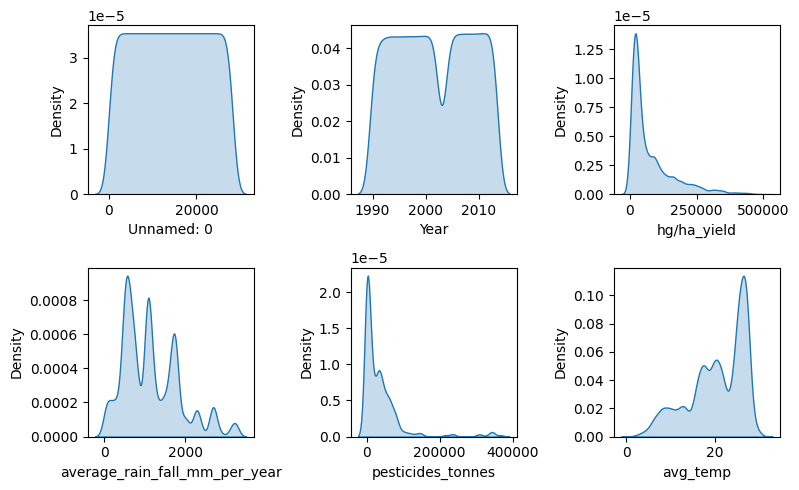

In [8]:
plt.figure(figsize=(8,5))

for i in range(len(num_features)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(df[num_features[i]] , shade = True)
    plt.xlabel(num_features[i])
    
plt.tight_layout()
plt.show()

# We can see that pesticides_tonnes , avg_temp , hg/ha_yield and average_rain_fall_mm_per_year are not normally distributed so we can use the log1p tranform to reduce the effets of outliers and make it more normal

- Box plot

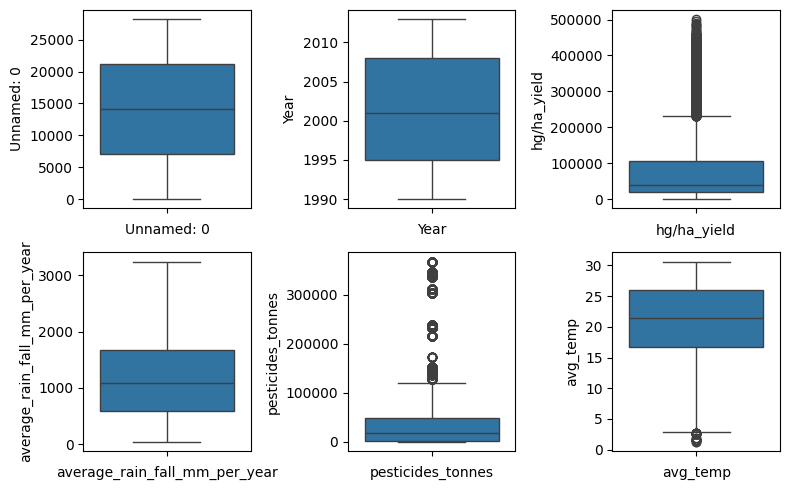

In [9]:
plt.figure(figsize=(8,5))

for i in range(len(num_features)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[num_features[i]])
    plt.xlabel(num_features[i])
    
plt.tight_layout()
plt.show()

# There is outliers in pesticides_tonnes features and hg/ha_yieldh

In [10]:
# So there is no null valyes in the hg/ha_yield feature we can go on an do the log transform
df[df['hg/ha_yield']==0]

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp


In [11]:
# So there is no null valyes in the pesticides_tonnes feature we can go on an do the log transform
df[df['pesticides_tonnes']==0]

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp


In [12]:
# So there is no null valyes in the avg_temp feature we can go on an do the log transform
df[df['avg_temp']==0]

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp


In [13]:
# df['hg/ha_yield'] = np.log1p(df['hg/ha_yield'])
# df['pesticides_tonnes'] = np.log1p(df['pesticides_tonnes'])
# df['avg_temp'] = np.log1p(df['avg_temp'])

# plt.figure(figsize=(8,5))

# for i in range(len(num_features)):
#     plt.subplot(2,3,i+1)
#     sns.kdeplot(df[num_features[i]],shade = True)
#     plt.xlabel(num_features[i])
    
# plt.tight_layout()
# plt.show()

# Observation
- But as we are doing the Random Forest or other enesemble tenchniques we don't requires normal features

In [14]:
df[obj_features[1]].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

# Creating an target guided encodings for the country value

In [15]:
df.groupby('Area')['hg/ha_yield'].mean()

Area
Albania            57692.282828
Algeria            58872.491228
Angola             34893.676829
Argentina          89304.434783
Armenia            71811.111111
                      ...      
Ukraine            43626.198413
United Kingdom    240956.478261
Uruguay            59253.540373
Zambia             39425.603261
Zimbabwe           40264.288043
Name: hg/ha_yield, Length: 101, dtype: float64

# Mean Value is used

In [16]:
mean_area_yield = df.groupby('Area')['hg/ha_yield'].mean().to_dict()
mean_area_yield

{'Albania': 57692.28282828283,
 'Algeria': 58872.491228070176,
 'Angola': 34893.67682926829,
 'Argentina': 89304.43478260869,
 'Armenia': 71811.11111111111,
 'Australia': 112951.4099378882,
 'Austria': 113044.35416666667,
 'Azerbaijan': 39727.41379310345,
 'Bahamas': 65443.53731343283,
 'Bahrain': 153237.55172413794,
 'Bangladesh': 52518.08843537415,
 'Belarus': 74679.55555555556,
 'Belgium': 216468.46153846153,
 'Botswana': 7353.921875,
 'Brazil': 73583.79710144928,
 'Bulgaria': 45384.60144927536,
 'Burkina Faso': 33061.614130434784,
 'Burundi': 33966.88888888889,
 'Cameroon': 46599.49130434782,
 'Canada': 62874.858695652176,
 'Central African Republic': 26432.465838509317,
 'Chile': 89396.58260869565,
 'Colombia': 65041.3961352657,
 'Croatia': 57934.92380952381,
 'Denmark': 214033.02,
 'Dominican Republic': 68783.05978260869,
 'Ecuador': 34324.6231884058,
 'Egypt': 114375.30434782608,
 'El Salvador': 91608.39130434782,
 'Eritrea': 18155.2,
 'Estonia': 85610.42857142857,
 'Finland': 1

In [17]:
df['Area_Encoding'] = df['Area'].map(mean_area_yield)
df[['Area','Area_Encoding']]

,Area,Area_Encoding
0,Albania,57692.282828
1,Albania,57692.282828
2,Albania,57692.282828
3,Albania,57692.282828
4,Albania,57692.282828
...,...,...
28237,Zimbabwe,40264.288043
28238,Zimbabwe,40264.288043
28239,Zimbabwe,40264.288043
28240,Zimbabwe,40264.288043


# Dropping area

In [18]:
df.drop('Area',axis = 1 ,inplace =True)
df

,Unnamed: 0,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Encoding
0,0,Maize,1990,36613,1485.0,121.00,16.37,57692.282828
1,1,Potatoes,1990,66667,1485.0,121.00,16.37,57692.282828
2,2,"Rice, paddy",1990,23333,1485.0,121.00,16.37,57692.282828
3,3,Sorghum,1990,12500,1485.0,121.00,16.37,57692.282828
4,4,Soybeans,1990,7000,1485.0,121.00,16.37,57692.282828
...,...,...,...,...,...,...,...,...
28237,28237,"Rice, paddy",2013,22581,657.0,2550.07,19.76,40264.288043
28238,28238,Sorghum,2013,3066,657.0,2550.07,19.76,40264.288043
28239,28239,Soybeans,2013,13142,657.0,2550.07,19.76,40264.288043
28240,28240,Sweet potatoes,2013,22222,657.0,2550.07,19.76,40264.288043


# Dropping Unnamed

In [19]:
df.drop('Unnamed: 0', axis = 1 , inplace = True)
df

,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Encoding
0,Maize,1990,36613,1485.0,121.00,16.37,57692.282828
1,Potatoes,1990,66667,1485.0,121.00,16.37,57692.282828
2,"Rice, paddy",1990,23333,1485.0,121.00,16.37,57692.282828
3,Sorghum,1990,12500,1485.0,121.00,16.37,57692.282828
4,Soybeans,1990,7000,1485.0,121.00,16.37,57692.282828
...,...,...,...,...,...,...,...
28237,"Rice, paddy",2013,22581,657.0,2550.07,19.76,40264.288043
28238,Sorghum,2013,3066,657.0,2550.07,19.76,40264.288043
28239,Soybeans,2013,13142,657.0,2550.07,19.76,40264.288043
28240,Sweet potatoes,2013,22222,657.0,2550.07,19.76,40264.288043


# One Hot Encoding for the Item Feature

In [20]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False, drop = 'first')

encodings = ohe.fit_transform(df[['Item']])
item_df = pd.DataFrame(encodings , columns = ohe.get_feature_names_out(),index = df.index)
df = pd.concat([df,item_df],axis = 1)
df.drop('Item',axis = 1 , inplace = True)
df

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Encoding,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485.0,121.00,16.37,57692.282828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1990,66667,1485.0,121.00,16.37,57692.282828,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1990,23333,1485.0,121.00,16.37,57692.282828,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1990,12500,1485.0,121.00,16.37,57692.282828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1990,7000,1485.0,121.00,16.37,57692.282828,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,2013,22581,657.0,2550.07,19.76,40264.288043,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28238,2013,3066,657.0,2550.07,19.76,40264.288043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28239,2013,13142,657.0,2550.07,19.76,40264.288043,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28240,2013,22222,657.0,2550.07,19.76,40264.288043,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Correlation

In [21]:
df.corr()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Encoding,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
Year,1.000000,0.091630,-0.003798,0.140930,0.014409,-0.002445,0.000554,-0.000746,0.002011,-0.003617,0.004503,0.002096,-0.002651,0.000024,0.000647
hg/ha_yield,0.091630,1.000000,0.000962,0.064085,-0.114777,0.381771,-0.198230,0.048354,0.610305,-0.157857,-0.238777,-0.254849,0.166936,-0.219730,0.076761
average_rain_fall_mm_per_year,-0.003798,0.000962,1.000000,0.180984,0.313040,0.002520,-0.029659,0.140728,-0.052759,0.019567,-0.064516,-0.019357,0.039515,-0.107450,0.121164
pesticides_tonnes,0.140930,0.064085,0.180984,1.000000,0.030946,0.119787,-0.029719,-0.068887,-0.034692,-0.000829,-0.001937,0.022003,0.013354,-0.010770,0.102259
avg_temp,0.014409,-0.114777,0.313040,0.030946,1.000000,-0.307314,-0.040435,0.083091,-0.102716,0.042277,0.048906,-0.050173,0.087513,-0.151914,0.059980
Area_Encoding,-0.002445,0.381771,0.002520,0.119787,-0.307314,1.000000,-0.008531,-0.068572,0.094200,-0.036279,-0.089603,-0.004599,0.010103,0.090671,-0.013346
Item_Maize,0.000554,-0.198230,-0.029659,-0.029719,-0.040435,-0.008531,1.000000,-0.058575,-0.174592,-0.152608,-0.143530,-0.148354,-0.139555,-0.164387,-0.072679
Item_Plantains and others,-0.000746,0.048354,0.140728,-0.068887,0.083091,-0.068572,-0.058575,1.000000,-0.059859,-0.052322,-0.049209,-0.050863,-0.047846,-0.056360,-0.024918
Item_Potatoes,0.002011,0.610305,-0.052759,-0.034692,-0.102716,0.094200,-0.174592,-0.059859,1.000000,-0.155953,-0.146676,-0.151606,-0.142615,-0.167990,-0.074272
"Item_Rice, paddy",-0.003617,-0.157857,0.019567,-0.000829,0.042277,-0.036279,-0.152608,-0.052322,-0.155953,1.000000,-0.128207,-0.132516,-0.124657,-0.146838,-0.064920


# HeatMap

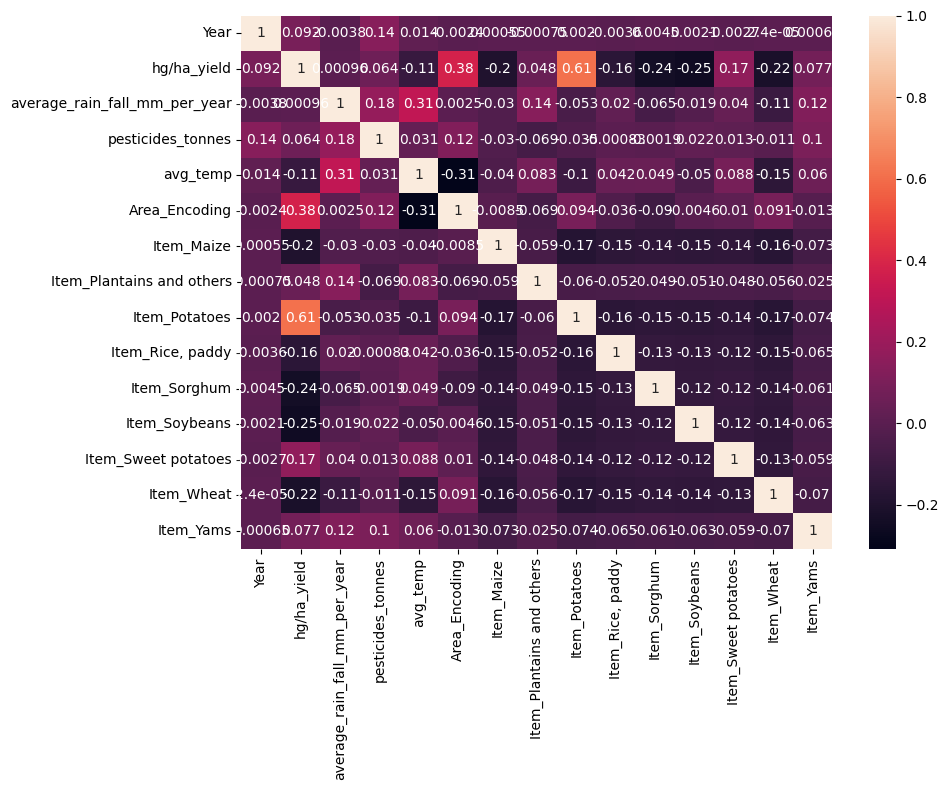

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot = True)
plt.tight_layout()
plt.show()

# Observation
- We are getting very good correlation for the output categories

# Depenedent and Independent Features

In [23]:
X = df.drop('hg/ha_yield',axis = 1)
Y = df['hg/ha_yield']
X

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Encoding,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.00,16.37,57692.282828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1990,1485.0,121.00,16.37,57692.282828,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1990,1485.0,121.00,16.37,57692.282828,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1990,1485.0,121.00,16.37,57692.282828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1990,1485.0,121.00,16.37,57692.282828,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,40264.288043,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28238,2013,657.0,2550.07,19.76,40264.288043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28239,2013,657.0,2550.07,19.76,40264.288043,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28240,2013,657.0,2550.07,19.76,40264.288043,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
Y

0        36613
1        66667
2        23333
3        12500
4         7000
         ...  
28237    22581
28238     3066
28239    13142
28240    22222
28241    22888
Name: hg/ha_yield, Length: 28242, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [26]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Encoding,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
875,1991,534.0,17866.00,20.29,112951.409938,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6978,2000,1113.0,2661.00,11.45,57934.923810,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20796,1990,1032.0,102.26,21.51,43254.826087,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14181,2011,1083.0,55540.00,25.72,80884.467391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13674,2009,1083.0,28707.01,25.73,80884.467391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,2001,151.0,31.00,29.46,76498.925466,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5390,1994,1604.0,411.42,24.93,46599.491304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,1991,534.0,17866.00,18.73,112951.409938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,1996,832.0,74617.20,12.28,100250.621118,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
X_test.shape ,X_test 

((7061, 14),
        Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
 25564  2008                          636.0           40719.00     17.21   
 18113  1996                         1513.0             152.01     19.71   
 25607  2010                          636.0           39043.00     16.51   
 6815   2007                         3240.0           82439.06     27.45   
 18144  2000                         1513.0             130.46     19.65   
 ...     ...                            ...                ...       ...   
 4149   2007                         1761.0          304031.00     20.93   
 8769   1992                          867.0           85249.00     11.15   
 10128  2010                         1440.0              27.85     27.19   
 20433  2013                          758.0           59920.18     25.36   
 12876  2004                         1083.0           35113.00     27.29   
 
        Area_Encoding  Item_Maize  Item_Plantains and others  Item_Potato

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

models = {
    "Random Forest" : RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    model.fit(X_train , Y_train)
    
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    score_train = r2_score(Y_train , Y_pred_train) 
    mse_train = mean_squared_error(Y_train , Y_pred_train)
    mae_train = mean_absolute_error(Y_train , Y_pred_train)
    
    score_test = r2_score(Y_test , Y_pred_test) 
    mse_test = mean_squared_error(Y_test , Y_pred_test)
    mae_test = mean_absolute_error(Y_test , Y_pred_test)
    
    print(f"*****{list(models.keys())[i]}******")
    
    print("The Training Score =",score_train)
    print("The MSE of Train =",mse_train)
    print("The Mae of Train =",mae_train)
    print("The Rmse of Train =",np.sqrt(score_train))
    
    print('-'*35)
    
    
    print("The Test Score =",score_test)
    print("The MSE of Test =",mse_test)
    print("The Mae of Test =",mae_test)
    print("The Rmse of Test =",np.sqrt(score_test))
    
    print('='*35)
    print("\n")

*****Random Forest******
The Training Score = 0.9982810565642969
The MSE of Train = 12354570.924135547
The Mae of Train = 1265.5550965487937
The Rmse of Train = 0.9991401586185478
-----------------------------------
The Test Score = 0.9879213982077422
The MSE of Test = 88261852.34009896
The Mae of Test = 3387.0740050984277
The Rmse of Test = 0.9939423515515083




# Hyperparameter Tuning

In [29]:
RandomForestRegressor()

params = {
    'n_estimators':[100,500],
    'max_depth': [8,15,None],
    'max_features': [5,8,'auto'],
    'min_samples_split': [8,20]
}

model_params = {}
from sklearn.model_selection import RandomizedSearchCV
tunning_models = [('RF',RandomForestRegressor(),params)]

for name, model,param in tunning_models:
    rand = RandomizedSearchCV(estimator=model , param_distributions=param , cv = 3 , verbose = 2, n_iter= 50,n_jobs=-1)
    rand.fit(X_train , Y_train)
    model_params[name] = rand.best_params_
    
for model_name in model_params:
    print(f"----------------------- Best Params for {model_name} ---------------------------")
    print(model_params[model_name])

Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------------------- Best Params for RF ---------------------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_features': 8, 'max_depth': None}


# Tuning the new model on the best parameters

In [30]:
tunned_model = RandomForestRegressor(n_estimators = 500, min_samples_split = 8, max_features = 8, max_depth = None)

tunned_model.fit(X_train , Y_train)

Y_pred_tune_test = tunned_model.predict(X_test)

score_tune_test = r2_score(Y_test , Y_pred_tune_test) 
mse_tune_test = mean_squared_error(Y_test , Y_pred_tune_test)
mae_tune_test = mean_absolute_error(Y_test , Y_pred_tune_test)

print("The Test Score =",score_tune_test)
print("The MSE of Test =",mse_tune_test)
print("The Mae of Test =",mae_tune_test)
print("The Rmse of Test =",np.sqrt(score_tune_test))
    
print('='*35)
print("\n")



The Test Score = 0.9855796974426917
The MSE of Test = 105373340.13515645
The Mae of Test = 4133.533017596331
The Rmse of Test = 0.9927636664597933




# Pickling the File

In [31]:
import pickle
pickle.dump(model,open("Crop_Yield_Prediction.pkl","wb"))

# Observation
- We did the fine tuning and the prediction on the crop yield dataset and by using Random Forest Regressor and got the accuracy of 98.7%